# Python基础/Numpy/Sympy/Matplotlib回顾

# 1. Python 基础 & NumPy 入门

## 学习目标
- 复习 Python 变量/容器/控制流/函数与模块的最小工作流。
- 掌握 NumPy 的 ndarray 创建、形状操作、切片/视图、基本运算。
- 能用向量化代替循环、做基础统计与布尔索引。

## 提示
- 本节重点是“写少、算快、思路清晰”。注意切片返回视图、副本的差异。


In [5]:
# --- Python 基础  ---
# 变量与动态类型
a = 1
a = "now a string"
x, y = 3, 5

### 列表(list)
- 是内置的可变序列，适合存放会被增删改的数据。可用 `[]` 创建或者`list([])`，`len(L)` 返回长度；
- 通过下标访问元素，下标自 0 开始，也支持负下标`-1` 表示最后一个。
- 当下标越界会抛出 `IndexError`。这些是使用列表的基础规则。

In [8]:
# 容器与推导式
l1 = [ 1, 2, 3, 4, 5, 6 ]
l1, type(l1)

([1, 2, 3, 4, 5, 6], list)

In [10]:
l2 = list([1,2,3,4,5,6])
l2, type(l2)

([1, 2, 3, 4, 5, 6], list)

In [12]:
l1 == l2

True

In [14]:
for _k, _val in enumerate(l2):
    print(_k, _val)

0 1
1 2
2 3
3 4
4 5
5 6


In [16]:
lstr = ['A', 'B', 'C']
lstr.append('D')      # ['A','B','C','D']
lstr

['A', 'B', 'C', 'D']

In [18]:

lstr.insert(1, 'X')   # ['A','X','B','C','D']
lstr

['A', 'X', 'B', 'C', 'D']

In [20]:
lstr.pop(), lstr            # -> 'D'; ['A','X','B','C']

('D', ['A', 'X', 'B', 'C'])

In [22]:
lstr.pop(1), lstr           # -> 'X'; ['A','B','C']

('X', ['A', 'B', 'C'])

### 字典(tuple)
字典是 Python 中的映射类型，以键值对（`key-value`）形式存储数据。  
- 通过`{key : value}` 定义，或者`dict()` 定义
- key：必须唯一、不可变（字符串、整数、元组），内部通过哈希实现。  
- value：可以是任意对象，允许重复。  

({'a': 97, 'b': 98, 'c': 99, 'd': 100}, dict)

In [27]:
for _key, _val in dic1.items():
    print(_key, _val)

a 97
b 98
c 99
d 100


In [29]:
for _key in dic1.keys():
    print(_key)

a
b
c
d


In [31]:
for _key in dic1.values():
    print(_key)

97
98
99
100


In [33]:
dic.values()

dict_values([])

### 小练习
原本有一组人 
```python
group_a_names = [ "Alice", "Bob", "Catherine", "David", "Emily"]
scores_a = [ 50, 70, 78, 98, 85 ]
```
生成关于题目的成绩字典，方便查询题目的成绩。

把另一组人的成绩也更新如字典
```python
group_b_names = [ "Frank", "Grace", "Henry", "Ivy", "Jack" ]
scores_b = [60, 76, 78, 80, 82]
```

In [56]:
group_a_names = [ "Alice", "Bob", "Catherine", "David", "Emily"]
scores_a = [ 50, 70, 78, 98, 85 ]

dic2 = {}
for _k,_name in enumerate(group_a_names):
    dic2[_name] = scores_a[_k]
    
dic2


{'Alice': 50, 'Bob': 70, 'Catherine': 78, 'David': 98, 'Emily': 85}

In [58]:
group_b_names = [ "Frank", "Grace", "Henry", "Ivy", "Jack" ]
scores_b = [60, 76, 78, 80, 82]

for _k,_name in enumerate(group_b_names):
    dic2[_name] = scores_b[_k]

dic2

{'Alice': 50,
 'Bob': 70,
 'Catherine': 78,
 'David': 98,
 'Emily': 85,
 'Frank': 60,
 'Grace': 76,
 'Henry': 78,
 'Ivy': 80,
 'Jack': 82}

### 元组(dict)
元组与列表同为有序序列，但元组***一经创建就不能修改***——没有 `append`、`insert` 等方法，也不能对下标赋值。不可变换来的是更高的安全性和更清晰的“只读”语义。

In [5]:
t = (1, 2, 3)
t, type(t)

((1, 2, 3), tuple)

### 集合(set)
集合是一种无序、不重复的元素容器。常用于去重、集合运算（并集、交集、差集）。  


In [6]:
st = {"apple", "banana", "apple"}  # 去重
st, type(st)

({'apple', 'banana'}, set)

In [82]:
s = {1, 2, 3}
# 增删
s.add(4)          # 增加单个元素
s

In [83]:
s.update([5,6])   # 一次添加多个元素
s

In [84]:
s.remove(2)       # 删除指定元素，不存在时报错
s

In [85]:
s.discard(10)     # 删除元素，不存在也不报错
s

In [86]:
s.pop()           # 删除并返回任意一个元素
s

In [89]:
#### 集合支持数学集合的运算：
a = {1,2,3}
b = {2,3,4}

print(a & b)     # 交集 {2,3}

{2, 3}


In [90]:
print(a - b)     # 差集 {1}

{1}


In [91]:
print(a ^ b)     # 对称差集 {1,4}

{1, 4}


In [92]:
a.issubset(b)    # 判断子集

False

In [93]:
a.issuperset(b)  # 判断超集

False

### 控制流与函数

In [94]:
def sign(z):
    if z > 0: 
        return "pos"
    elif z < 0:
        return "neg"
    else:
        return "zero"

sign(-3)

'neg'

### 学生等级评估器

这是一个关于 **Python 控制流（`if`/`elif`/`else` 循环）与函数** 的小练习。

---

**任务描述**

编写一个名为 `evaluate_grade` 的函数，该函数接受一个参数：学生的**分数**（`score`，一个整数或浮点数）。

该函数应根据以下评分标准，返回一个代表学生等级的字符串（'A', 'B', 'C', 'D', 'F'）。

**评分标准**

| 分数范围 | 等级 |
| :--- | :--- |
| $90 \le \text{score} \le 100$ | A |
| $80 \le \text{score} < 90$ | B |
| $70 \le \text{score} < 80$ | C |
| $60 \le \text{score} < 70$ | D |
| $\text{score} < 60$ | F |

---

**练习要求**

1.  **定义函数:** 编写 `evaluate_grade(score)` 函数。
2.  **使用控制流:** 在函数内部使用 `if`, `elif`, 和 `else` 语句来检查分数并确定等级。
3.  **处理无效输入:** 如果分数小于 0 或大于 100，返回错误信息，例如 `"Invalid Score: Must be between 0 and 100."`

### 示例测试

| 输入 (`score`) | 预期输出 |
| :--- | :--- |
| `95` | `'A'` |
| `82` | `'B'` 
| `68` | `'D'` |
| `55` | `'F'` |
| `105` | `'Invalid Score: Must be between 0 and 100.'` |

---
请在下方实现函数并运行测试：

In [95]:
def evaluate_grade(score):
    if score < 0 or score > 100:
        return "Invalid Score: Must be between 0 and 100."
    # 在这里编写你的控制流代码
    
    if score < 60:
        return "F"
    elif score < 70:  
        return "D"
    elif score < 80: 
        return "C"
    elif score < 90:  
        return "B"
    else:  
        return "A"


# --- 测试你的函数 ---
print(f"95: {evaluate_grade(95)}")
print(f"82: {evaluate_grade(82)}")
print(f"75: {evaluate_grade(75)}")
print(f"68: {evaluate_grade(68)}")
print(f"55: {evaluate_grade(55)}")
print(f"100: {evaluate_grade(100)}")
print(f"105: {evaluate_grade(105)}")
print(f"-5: {evaluate_grade(-5)}")

95: A
82: B
75: C
68: D
55: F
100: A
105: Invalid Score: Must be between 0 and 100.
-5: Invalid Score: Must be between 0 and 100.


---
# NumPy 回顾

### 什么是 NumPy？

NumPy (Numerical Python) 是 Python 中用于科学计算的基础包。它提供了一个高性能的**多维数组对象** (`ndarray`)，以及用于处理这些数组的工具。

### 为什么要用 NumPy？

Python 内建的 `list` (列表) 对于大规模数值计算有两大缺点：**速度慢**和**效率低**（缺乏向量化操作，依赖 `for` 循环）。

**NumPy 的优势:**

* **性能优越 (C 语言实现):** 核心功能由 C 语言实现，运算速度比 Python 列表快 **10 到 100 倍**。
* **向量化 (Vectorization):** 允许对整个数组进行数学运算，无需显式写循环。
* **内存连续:** 数据存储在连续的内存块中，CPU 访问效率极高。

## NumPy：数组创建与形状操作
- `np.array`, `np.zeros/ones/empty`, `np.arange/linspace`
- 形状：`shape`, `reshape`, `ravel` vs `flatten`
- 数据类型：`dtype`、显式转换 `astype`

#### 1. 创建数组

| 方法 | 描述 | 示例 |
| :--- | :--- | :--- |
| **从列表** | 创建数组 | `a = np.array([1, 2, 3])` |
| `np.zeros(shape)` | 全零数组 | `np.zeros(3)` $\rightarrow$ `[0. 0. 0.]` |
| `np.ones(shape)` | 全一数组 | `np.ones((2, 2))` |
| `np.arange()` | 生成序列 | `np.arange(0, 10, 2)` $\rightarrow$ `[0 2 4 6 8]` |
| `np.linspace()` | 生成等间隔数值 | `np.linspace(0, 1, 5)` $\rightarrow$ `[0. 0.25 0.5 0.75 1.]` |


In [98]:
import numpy as np

In [99]:
z = np.zeros((2,3))
z

array([[0., 0., 0.],
       [0., 0., 0.]])

In [100]:
o = np.ones((3,1))
o

array([[1.],
       [1.],
       [1.]])

In [101]:
ar = np.arange(0, 10, 2)           # 0,2,4,6,8
print("ar:", ar)

ar: [0 2 4 6 8]


In [102]:
ls = np.linspace(0, 10, 11)          # n-1 等分点
print("ls:", ls)

ls: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [103]:
log_arr = np.logspace(-1, 1, 11) # 对数空间的n-1等分
log_arr

array([ 0.1       ,  0.15848932,  0.25118864,  0.39810717,  0.63095734,
        1.        ,  1.58489319,  2.51188643,  3.98107171,  6.30957344,
       10.        ])

In [15]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [16]:
import matplotlib.pyplot as plt

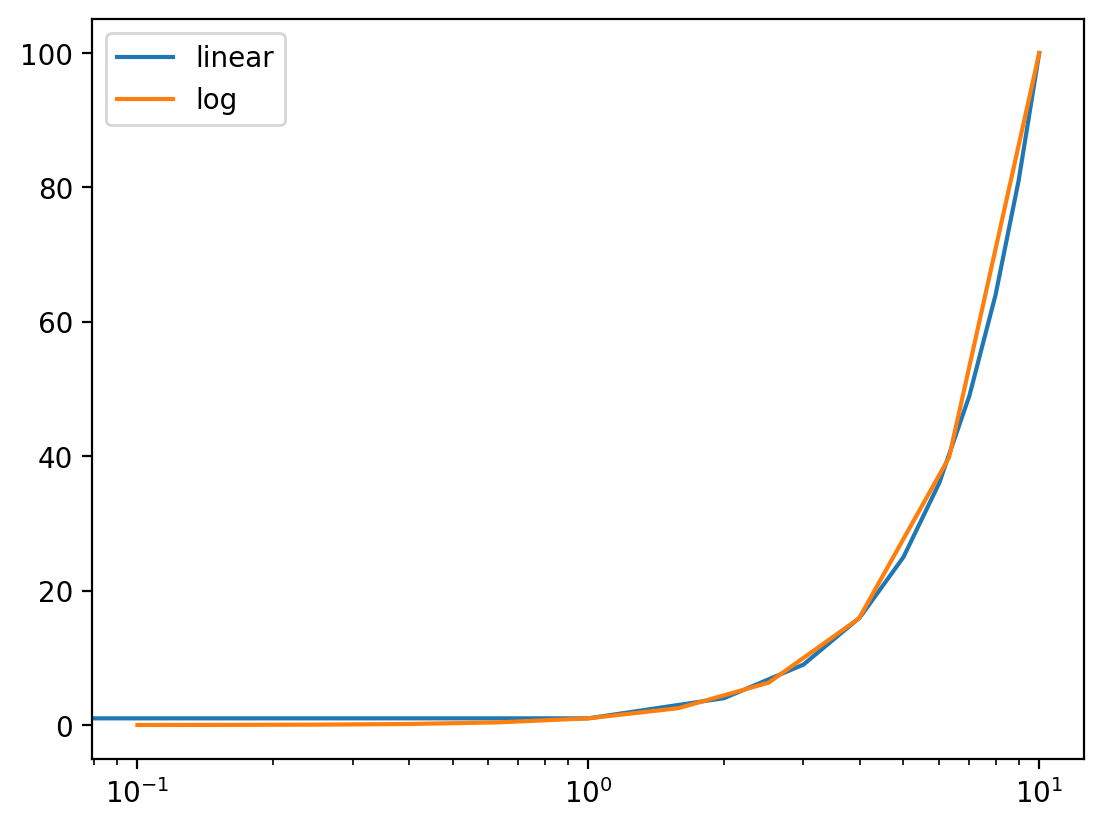

In [17]:
plt.plot(ls, ls**2, label = 'linear' )
plt.plot(log_arr, log_arr**2, label = 'log' )
plt.xscale('log')
plt.legend()
plt.show()

### 2. 数组属性 (Attributes)

In [97]:

a = np.array([[1,2,3],[4,5,6]], dtype=np.int32)

print("a.shape:", a.shape, "a.dtype:", a.dtype)

b = a.reshape(3,2)                 # 形状变换不改数据
print("b:\n", b)


a.shape: (2, 3) a.dtype: int32
b:
 [[1 2]
 [3 4]
 [5 6]]


## 索引与切片

#### 1. 多维数组索引

使用逗号 `,` 分隔每个维度的索引：`array[row_index, col_index]`

In [104]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(matrix[0, 1])   # 输出: 2 (第一行，第二列)

2


#### 2. 切片 (Slicing)

使用 `:` 来选择一个范围，规则是 `start:stop:step` (不包含 `stop`)：

In [107]:
# 选择第二行所有元素
print(matrix[1, :])   # 输出: [4 5 6]

[4 5 6]


In [108]:
# 选择中间的 2x2 子矩阵
print(matrix[1:3, 1:3])

[[5 6]
 [8 9]]


### 向量化操作

#### 1. 数组运算 (逐元素操作)

In [109]:
arr = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

In [111]:
# 数组与标量运算
print(arr + 10)  # 输出: [11 12 13 14]

[11 12 13 14]


In [112]:
# 数组与数组运算 (逐元素相乘)
print(arr * b)   # 输出: [10 40 90 160]

[ 10  40  90 160]


#### 2. 矩阵乘法

使用 `@` 运算符或 `np.dot()` 函数进行标准的线性代数矩阵乘法：

In [113]:
M1 = np.array([[1, 2], [3, 4]])  
M2 = np.array([[5, 6], [7, 8]]) 

# 矩阵乘法 M1 * M2
print(M1 @ M2) # 预期结果: [[19, 22], [43, 50]]

[[19 22]
 [43 50]]


#### 3. 聚合函数 (Aggregation)

用于计算整个数组或沿着特定轴（维度）的统计量：

| 函数 | 描述 |
| :--- | :--- |
| `arr.sum()` |	求和 |
| `arr.mean()` |	平均值 |
| `arr.min()` |	最小值 |
| `arr.max()` |	最大值 |

In [115]:
data = np.array([[1, 2], [3, 4]])

print(data.sum())     # 输出: 10 (所有元素之和)

10


In [116]:
# 沿着 axis=0 (按列/跨行) 求和
print(data.sum(axis=0))  # 输出: [4 6] 

[4 6]


In [117]:
# 沿着 axis=1 (按行/跨列) 求和
print(data.sum(axis=1))  # 输出: [3 7] 

[3 7]


### 注意事项
- 切片通常返回**视图**（共享底层内存），修改会“连坐”。
- 使用 `copy()` 得到独立副本。

In [118]:
x = np.arange(10)
y = x[2:7]           # 视图
y[0] = 999
print("x after modifying y:", x)   # x 也被改了

x after modifying y: [  0   1 999   3   4   5   6   7   8   9]


In [119]:
x = np.arange(10)

y_safe = x[2:7].copy()
y_safe[0] = -1
print("x after modifying y_safe(copy):", x)

x after modifying y_safe(copy): [0 1 2 3 4 5 6 7 8 9]


## 数据的排序、拼接和拆分

In [23]:
# 排序 / argsort / searchsorted（有序插入位）
xs = np.sort(x)
idx = np.argsort(x)
pos = np.searchsorted(xs, 4)   # 在有序数组 xs 中 4 应插入的位置

print("sorted:", xs, "argsort:", idx, "insert 4 at:", pos)

sorted: [2 2 3 4 5 7 8 9] argsort: [1 5 4 3 7 0 6 2] insert 4 at: 3


In [123]:
# 拼接/拆分
a = np.ones((2,2))
b = np.zeros((2,2))
ab1 = np.concatenate([a, b], axis=0)
ab2 = np.concatenate([a, b], axis=1)
print("concat axis=0:\n", ab1)
print("concat axis=1:\n", ab2)

concat axis=0:
 [[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]]
concat axis=1:
 [[1. 1. 0. 0.]
 [1. 1. 0. 0.]]


## 广播
**广播 (Broadcasting)** 描述了 NumPy 如何处理具有**不同形状**的数组之间的算术运算。这是让 NumPy 高效处理不同形状数组进行运算的关键。

**核心概念**

广播机制自动扩展（或“拉伸”）较小的数组，使其与较大数组的形状兼容，从而使得逐元素运算得以进行，而**无需实际复制数据**，极大地提高了效率。

**广播规则**

两个数组（A 和 B）只有在满足以下所有规则时，才能进行广播运算：

1.  **比较维度：** 从两个数组的**末尾维度**（最右边）开始比较它们的形状。
2.  **兼容条件：** 只要满足以下任一条件，维度就是兼容的：
    * **维度相等**。
    * **其中一个维度是 1**。
3.  **缺失维度：** 如果一个数组的维度少于另一个数组，则在较小数组的**左侧**（前面）填充 1，然后再按规则 2 进行比较。

In [121]:
print("-" * 20)

# 示例 1: 数组与标量 (最常见广播)
A = np.array([1, 2, 3])
B = 10 
C = A + B  # 标量 10 被广播为 [10, 10, 10]

print("示例 1: 数组 + 标量")
print(f"A ({A.shape}) + B ({B}): {C}") 

--------------------
示例 1: 数组 + 标量
A ((3,)) + B (10): [11 12 13]


### 典型示例 2: 2D 数组与 1D 数组

将一个 $4 \times 3$ 的矩阵，与一个 $(3,)$ 的行向量相加。

| 数组 A (4, 3) | 数组 B (3,) |
| :--- | :--- |
| $\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \\ 10 & 11 & 12 \end{pmatrix}$ | $\begin{pmatrix} 10 & 20 & 30 \end{pmatrix}$ |

**兼容性检查 (从右往左):**
1.  **末尾维度：** A 是 `3`， B 是 `3`。$\rightarrow$ **相等，兼容**。
2.  **左侧维度：** A 是 `4`， B 隐式是 `1`。$\rightarrow$ **其中一个是 1，兼容**。

**操作:** 向量 B 被拉伸（复制）四次，与矩阵 A 的每一行相加。

In [122]:
# 示例 2: 2D 数组 (4, 3) 与 1D 数组 (3,)
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9], 
              [10, 11, 12]])
B = np.array([10, 20, 30])

C = A + B
print("示例 2: A (4, 3) + B (3,)")
print(f"A 形状: {A.shape}")
print(f"B 形状: {B.shape}")
print("结果 C:")
print(C)

示例 2: A (4, 3) + B (3,)
A 形状: (4, 3)
B 形状: (3,)
结果 C:
[[11 22 33]
 [14 25 36]
 [17 28 39]
 [20 31 42]]


## NumPy 课堂小练习：矩阵与统计分析

**任务目标**

你将扮演一个数据分析师的角色，需要对一个 $5 \times 4$ 的数据集（矩阵）进行创建、处理和分析。

`data_matrix` 是 $5 \times 4$ 矩阵，包含 $1$ 到 $20$ 之间的**随机整数**。

- 步骤 1:  打印出 `data_matrix` 的 **形状 (`.shape`)** 和 **维度 (`.ndim`)**。

In [105]:
# 步骤 1: 在这里编写代码
import numpy as np

# 为了保持结果一致性，我们可以先设置随机种子 (可选)
np.random.seed(42) 

# 1.1 创建 5x4 的随机整数矩阵
data_matrix = np.random.randint(1, 21, size=(5, 4))

## 你的代码

print(f"data_matrix形状: {data_matrix.shape}")
print(f"data_matrix维度: {data_matrix.ndim}")


data_matrix形状: (5, 4)
data_matrix维度: 2


步骤 2: 索引与切片

- 从 `data_matrix` 中提取出第 3 行的所有元素（索引为 2），并将其赋值给变量 `row_three`。

- 从 `data_matrix` 中提取出第 2 列和第 4 列（索引分别为 1 和 3），以及所有行，形成一个新的 5×2 矩阵，并赋值给 `subset_cols`。

In [122]:
## 你的代码
row_three = data_matrix[2,:]
subset_cols = data_matrix[:,[1,3]]
row_three,subset_cols

(array([11,  4,  8,  3]),
 array([[20, 11],
        [ 7, 11],
        [ 4,  3],
        [12,  2],
        [12, 17]]))

步骤 3: 向量化运算与广播

假设你需要对 `data_matrix` 进行处理：

- 将 `data_matrix` 中的所有元素都加上一个标量 5，并赋值给 `matrix_plus_five`。
- 创建一个新的 (4,) 形状的行向量 `bias_vector = np.array([10, 20, 30, 40])`。
- 使用广播机制将 `bias_vector` 加到 `data_matrix` 的每一行，并赋值给 `final_data`。

In [128]:
## 你的代码
matrix_plus_five = (data_matrix + 5)
bias_vector = np.array([10, 20, 30, 40])
final_data = (data_matrix + bias_vector)
final_data

array([[17, 40, 45, 51],
       [18, 27, 49, 51],
       [21, 24, 38, 43],
       [12, 32, 36, 42],
       [11, 32, 42, 57]])

步骤 4: 聚合统计

计算 final_data 的统计信息：

- 计算整个 final_data 矩阵的平均值。
- 计算沿着 axis=0（列方向）的平均值。
- 计算沿着 axis=1（行方向）的最大值。

In [134]:
## 你的代码

total_mean = np.mean(final_data)
col_mean = np.mean(final_data, axis=0)
row_max = np.max(final_data, axis=1)

print("整个矩阵的平均值：", total_mean)
print("沿列方向的平均值：", col_mean)
print("沿行方向的最大值：", row_max)

整个矩阵的平均值： 34.4
沿列方向的平均值： [15.8 31.  42.  48.8]
沿行方向的最大值： [51 51 43 42 57]


## 随机与 I/O
- 生成器：`rng = np.random.default_rng(seed)`
- 分布：`normal`, `uniform`, `integers`, `binomial`…
- I/O：`np.save/np.load`（npy/npz），文本 `np.savetxt/np.loadtxt`（`fmt/delimiter/header`）


In [25]:
rng = np.random.default_rng(42)
g = rng.normal(loc=0, scale=1, size=10000)

# I/O 示例（演示路径用当前目录）
np.save("gauss.npy", g)                 # 二进制
np.savetxt("gauss.txt", g, fmt="%.5f", header="gaussian samples")  # 文本

g2 = np.load("gauss.npy")
g3 = np.loadtxt("gauss.txt", comments="#")
print("equal loaded:", np.allclose(g, g2), g3.shape)


equal loaded: True (10000,)


---
# Matplotlib 复习：

**核心概念：Figure 和 Axes**

Matplotlib 的绘图是基于面向对象的概念构建的：

1.  **Figure (画布/图):** 相当于整个画板或一张白纸，是所有元素的顶级容器。
2.  **Axes (子图/坐标系):** 实际的绘图区域，包含了 X 轴、Y 轴、刻度、数据点等。一个 Figure 可以包含多个 Axes。
3.  **pyplot 接口 (`plt`):** 快速绘图的函数集合。虽然方便，但在复杂或多图场景下，推荐使用**面向对象 (OO) 接口**。

---

散点 / 直方图 / 误差棒 / 双 y 轴

- `ax.scatter(x,y, c=..., s=..., cmap=..., alpha=...)` + `colorbar`
- `ax.hist(data, bins='auto' 或指定边界, density=True/False, range=..., alpha=...)`
- `ax.errorbar(x, y, yerr=(lower,upper), fmt='o-', capsize=...)`
- 双 y 轴：`ax.twinx()`（两个量），或 `secondary_yaxis`（单位换算）
- `contour / contourf`：等高线/填色等高线


In [127]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

中文字体设置

In [129]:
import platform, matplotlib as mpl
from matplotlib.font_manager import FontProperties, findfont

def first_ok(cands):
    for name in cands:
        try:
            findfont(FontProperties(family=name), fallback_to_default=False)
            return name
        except Exception:
            pass
    return None

sys = platform.system()
if sys == "Darwin":   # macOS
    cjk_candidates = ["Songti SC", "Hiragino Sans GB", "STHeiti", "PingFang SC",   ]
elif sys == "Windows":
    cjk_candidates = ["Microsoft YaHei", "SimHei", "NSimSun", "KaiTi"]
else:                 # Linux
    cjk_candidates = ["Noto Sans CJK SC", "Source Han Sans SC", "WenQuanYi Micro Hei", "AR PL UMing CN"]

cjk = first_ok(cjk_candidates)

#（可选）清理字体缓存，改完配置后建议重启 kernel
# import shutil; shutil.rmtree(mpl.get_cachedir(), ignore_errors=True)

mpl.rcParams.update({
    # 关键顺序：STIX（英文/数学） → DejaVu Sans（含 U+2212） → 中文
    "font.family": ["STIXGeneral", "DejaVu Sans"] + ([cjk] if cjk else []),
    "font.sans-serif": ["STIXGeneral", "DejaVu Sans"] + ([cjk] if cjk else []),

    # 数学字体固定用 STIX，防止落到“default”
    "mathtext.fontset": "stix",
    "mathtext.rm": "STIXGeneral",
    "mathtext.it": "STIXGeneral:italic",
    "mathtext.bf": "STIXGeneral:bold",

    "axes.unicode_minus": True,   # 使用 Unicode '−'（由 STIX/DejaVu 提供）
    "text.usetex": False,         # 没有配置 CJK 的 LaTeX 时必须关闭
    'font.size': 16, 
})
print("CJK fallback:", cjk or "未找到；建议安装 Noto Sans CJK / 思源黑体 / 微软雅黑 / 苹方")

CJK fallback: Songti SC


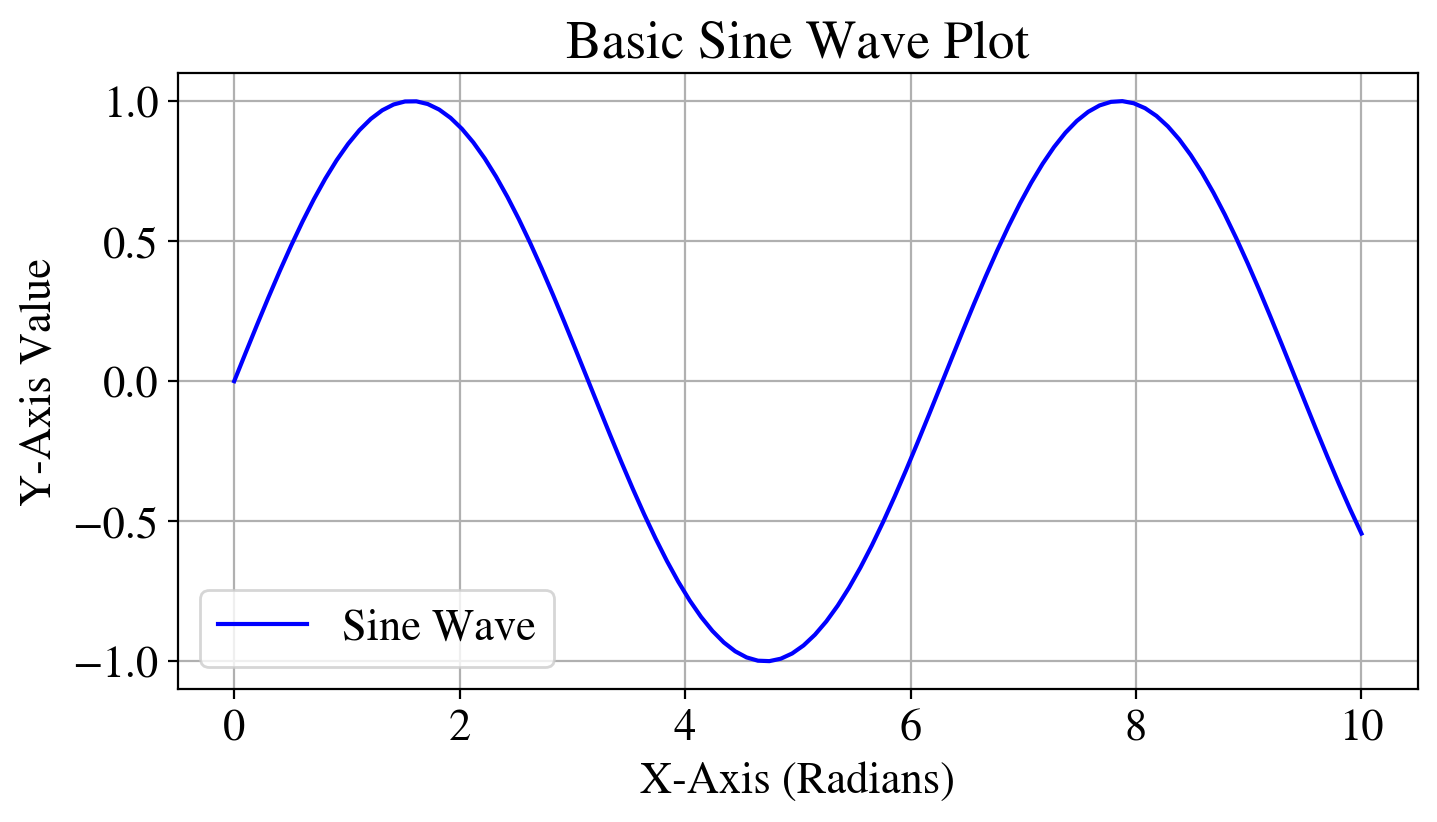

In [130]:
# 准备数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 基础绘图 (使用 plt 接口)
plt.figure(figsize=(8, 4)) # 创建 Figure (可选，设置大小)
plt.plot(x, y, 
         label='Sine Wave', 
         color='blue', 
         linestyle='-')

# 设置图表元素
plt.title('Basic Sine Wave Plot') # 标题
plt.xlabel('X-Axis (Radians)')   # X 轴标签
plt.ylabel('Y-Axis Value')       # Y 轴标签
plt.legend()                     # 显示图例
plt.grid(True)                   # 添加网格
plt.show()                       # 显示图形

## 进阶：面向对象 (OO) 接口

对于更复杂的图形或包含多个子图的场景，推荐使用面向对象 (OO) 接口。这能让你更精细地控制图表的每一个组件。

### 核心函数：`plt.subplots()`

`fig, ax = plt.subplots()` 会同时创建 Figure (fig) 和 Axes (ax) 对象。
* 我们通过 `ax` 对象的方法来绘图和设置属性（如 `ax.plot()`, `ax.set_title()`, `ax.set_xlabel()`）。

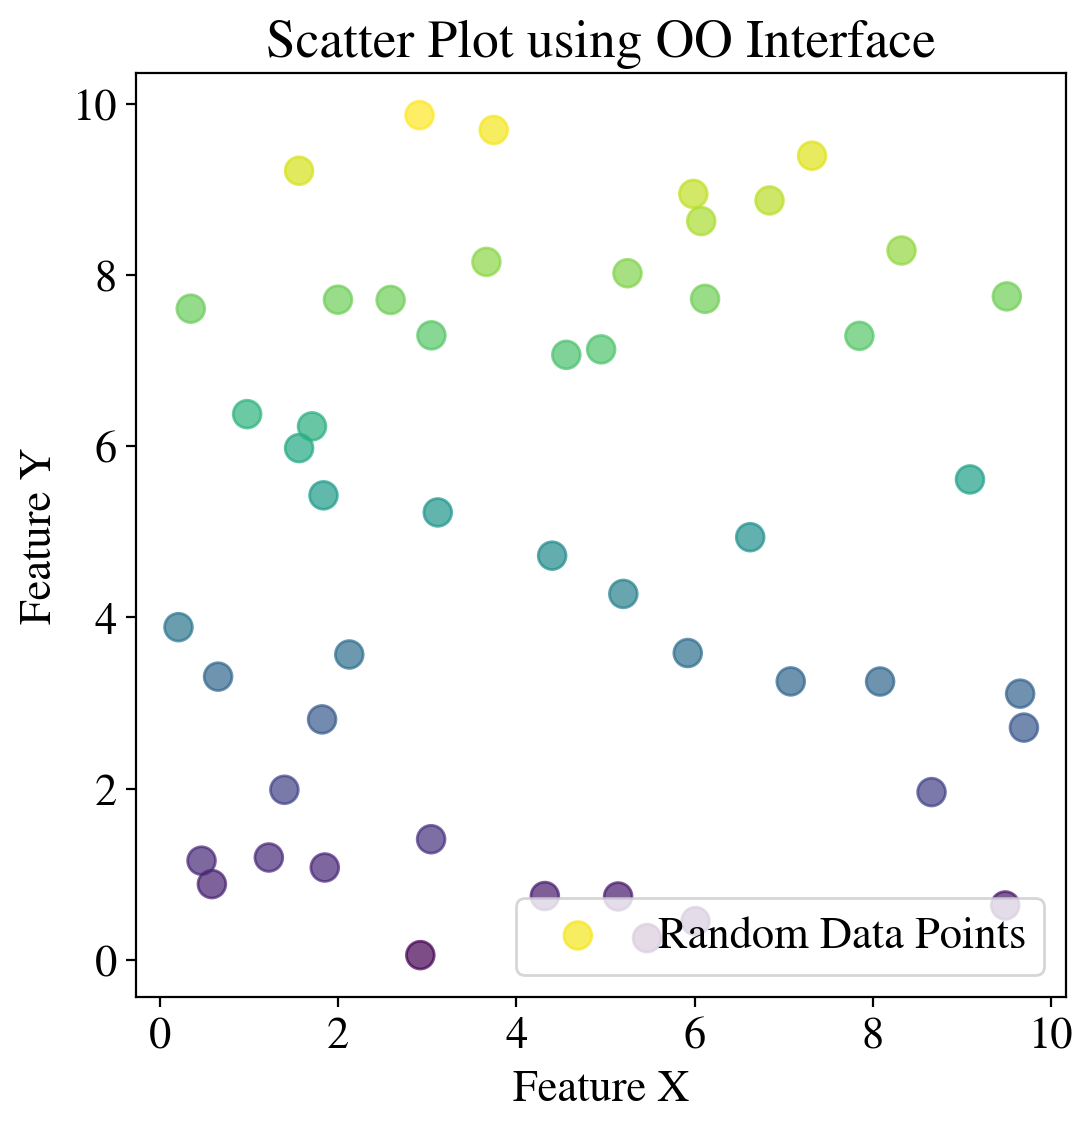

In [131]:
# 准备数据
np.random.seed(42)
data_x = np.random.rand(50) * 10
data_y = np.random.rand(50) * 10

# 使用 OO 接口创建图表
fig, ax = plt.subplots(figsize=(6, 6))

# 通过 Axes 对象绘图
ax.scatter(data_x, data_y, 
           s=100,              # 点的大小
           c=data_y,           # 点的颜色基于 y 值
           cmap='viridis',     # 颜色映射
           alpha=0.7,          # 透明度
           label='Random Data Points')

# 通过 Axes 对象设置属性 (注意方法名是 set_*)
ax.set_title('Scatter Plot using OO Interface')
ax.set_xlabel('Feature X')
ax.set_ylabel('Feature Y')
ax.legend(loc='lower right') # 设置图例位置

plt.show()

## 直方图绘图回顾


---

| 代码行 | 作用和功能 | 结果效果 |
| :--- | :--- | :--- |
| `fig, ax = plt.subplots(figsize=(6, 4))` | **初始化图表**。使用 Matplotlib **面向对象 (OO) 接口**创建 Figure (`fig`) 和 Axes (`ax`) 对象。`figsize=(6, 4)` 设置了画布大小。 | 创建了一个干净、可精细控制的绘图环境。 |
| `ax.hist(a, bins=bins, ...)` | **绘制第一个直方图**。使用 `ax` 对象的 `hist` 方法绘制数据集 `a` 的分布。 | 在坐标系中绘制数据集 A 的分布柱。 |
| `bins=bins` | **分箱设置**。指定了两个直方图的**分箱边界**。使用相同的 `bins` 至关重要，它确保了两个分布的柱子是完美对齐的，便于直接比较。 | 决定了每个柱子的宽度和数量，实现图表间的对齐。 |
| `density=True` | **归一化**。将直方图归一化，使得所有柱子的**面积总和为 1**。这样 Y 轴表示的是**概率密度**，而不是频数（计数）。 | Y 轴显示“密度”，使得不同大小数据集的分布形状可直接比较。 |
| `alpha=0.6` | **透明度**。设置柱子的不透明度为 0.6。在两个直方图重叠时，透明度允许读者看到重叠区域后方的柱子。 | 增强了图表的可读性，特别是在分布有交叉时。 |
| `label="A"` | **图例标签**。为该直方图指定一个标签。 | 在图例中显示数据集 A 的颜色。 |
| `ax.hist(b, bins=bins, ...)` | **绘制第二个直方图**。使用与 `a` 相同的参数绘制数据集 `b` 的分布。 | 在同一个坐标系中绘制数据集 B 的分布。 |
| `ax.set_xlabel("x")` | **设置 X 轴标签**。 | 明确 X 轴代表的含义。 |
| `ax.set_ylabel("density")` | **设置 Y 轴标签**。与 `density=True` 对应。 | 明确 Y 轴代表的含义。 |
| `ax.set_title("Two distributions (same bins)")` | **设置图表标题**。清晰地描述了图表的内容和比较目的。 | 提供了图表的上下文信息。 |
| `ax.legend()` | **显示图例**。根据 `ax.hist()` 调用中的 `label` 参数，显示每个数据集对应的颜色和标签。 | 帮助读者区分数据集 A 和 B。 |
| `ax.grid(True, ls=':')` | **添加网格线**。增强图表的视觉辅助性。`ls=':'` 设置网格线为虚线样式。 | 帮助读者更精确地估计数据点在坐标轴上的位置。 |
| `plt.show()` | **显示图形**。这是渲染和显示图表的命令。 | 渲染并显示最终生成的图表。 |

---

**图表分析目的总结**

这个双直方图代码片段的目标是实现高效的**分布比较**：

1.  **比较分布中心：** 直观地看出数据集 A 和 B 的平均值（中心趋势）是否不同。
2.  **比较分布宽度：** 观察哪个数据集的柱子更宽或更窄，以判断哪个数据集的方差（离散程度）更大。
3.  **重叠区域分析：** 通过透明度 (`alpha`) 观察两个分布的重叠程度，了解它们有多少共同的值范围。

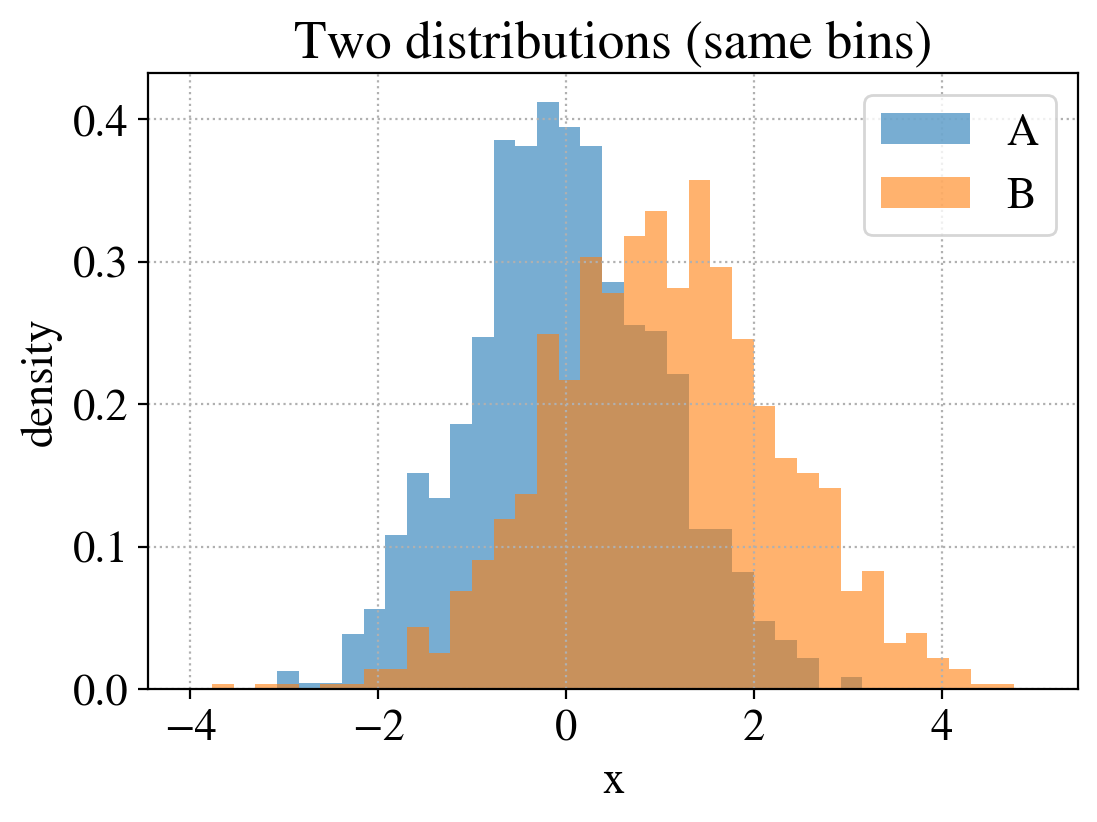

In [133]:
# 直方图：两组数据对比（共用 bins）
a = rng.normal(0, 1.0, 1000)
b = rng.normal(1.0, 1.2, 1200)
bins = np.linspace(-4, 5, 40)

fig, ax = plt.subplots(figsize=(6,4))

ax.hist(a, bins=bins, density=True, alpha=0.6, label="A")
ax.hist(b, bins=bins, density=True, alpha=0.6, label="B")

ax.set_xlabel("x")
ax.set_ylabel("density")
ax.set_title("Two distributions (same bins)")
ax.legend()
ax.grid(True, ls=':')

plt.show()


## 不对称误差棒图

这段代码用于绘制带有**不对称误差棒**的线条图，这种图表在科学实验中常用于展示数据的中心趋势及其不确定性范围。

---

## 代码分析表格

| 代码行 | 作用和功能 | 结果效果 |
| :--- | :--- | :--- |
| `fig, ax = plt.subplots(figsize=(6, 4))` | **初始化图表**。使用面向对象 (OO) 接口创建 Figure (`fig`) 和 Axes (`ax`) 容器。`figsize` 设置画布大小。 | 创建一个干净的绘图环境。 |
| `ax.errorbar(x, y, ...)` | **绘制带误差棒的图**。这是 Matplotlib 绘制数据点、连接线和不确定性范围的核心函数。 | 在图表上绘制数据点、连接线和误差线。 |
| `x, y` | **数据点**。输入两个一维数组，确定数据点在横轴和纵轴上的中心位置。 | 确定数据点在图表中的中心位置。 |
| `yerr=(yl, yu)` | **不对称误差范围**。指定 $Y$ 轴的误差。它接收一个**元组**，其中 `yl` 是向下（负方向）的误差数组，`yu` 是向上（正方向）的误差数组。| 误差棒的上端和下端长度可能不同，反映不同的正负不确定性，实现了**不对称**。 |
| `fmt='o-'` | **格式字符串**。控制数据点和连接线的样式。<br> • `'o'`：使用圆圈标记数据点。<br> • `'-'`：使用实线连接数据点。 | 数据点显示为圆圈，并被一条实线连接起来。 |
| `capsize=4` | **误差棒帽大小**。设置误差棒顶端和底端水平横线的长度（单位：点）。 | 使误差棒的端点更加清晰可见。 |
| `ecolor='tab:red'` | **误差线颜色**。设置误差棒本身的颜色为 Matplotlib 内置的红色主题。 | 误差线显示为红色，与数据点颜色分离（默认蓝色）。 |
| `ax.set_xlabel("n")` | **设置 X 轴标签**。 | X 轴标注为 "n"（通常代表实验序号、时间步等）。 |
| `ax.set_ylabel("measure")` | **设置 Y 轴标签**。 | Y 轴标注为 "measure"（代表测量值）。 |
| `ax.set_title("Errorbar (asymmetric)")` | **设置图表标题**。 | 明确指出图表内容是带有不对称误差棒的。 |
| `ax.grid(True, ls='--', alpha=0.3)` | **添加网格线**。增强视觉辅助。`ls='--'` 设置为虚线样式，`alpha=0.3` 设置为半透明。 | 在图表上添加透明虚线网格，不干扰数据主线。 |

---

**应用场景总结**

这段代码主要用于以下情况：

1.  **非均匀不确定性：** 当数据点的上行误差（如系统误差）和下行误差（如统计误差）本质上不同或通过非线性变换导致不对称时。
2.  **科学实验报告：** 用于精确地向读者展示数据的趋势、中心值和其伴随的非对称不确定性范围。

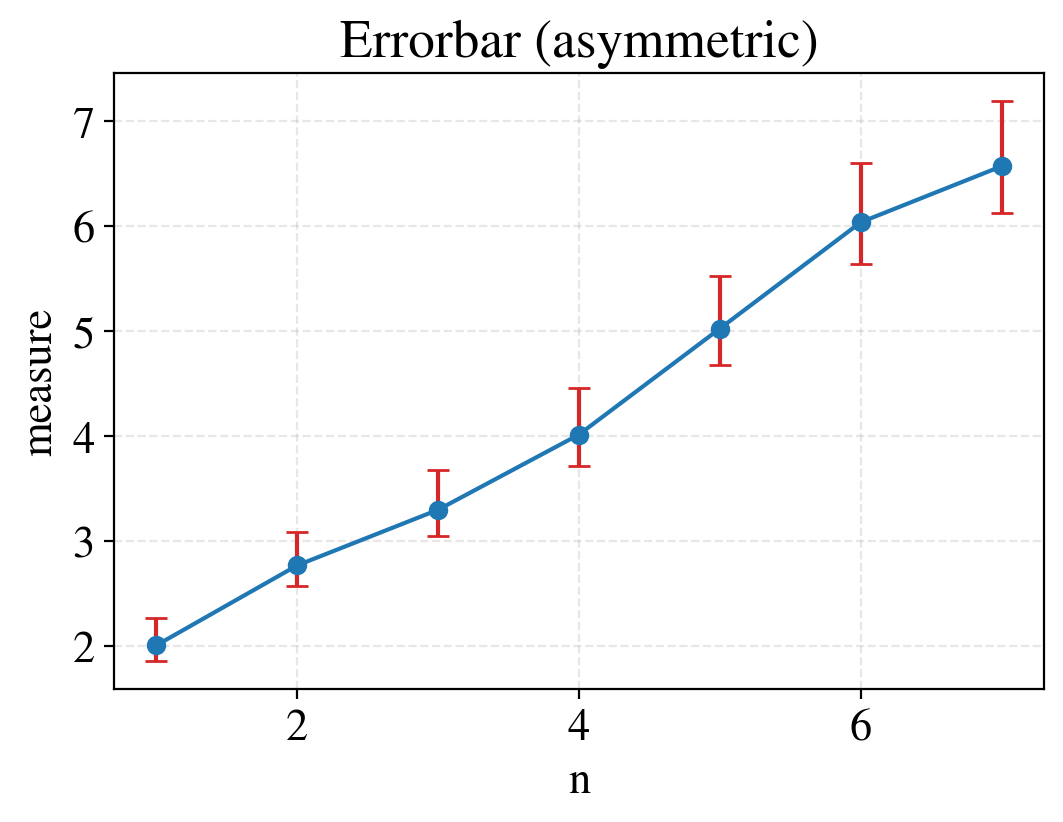

In [132]:
# 误差棒：非对称 yerr
x = np.arange(1, 8)
y = 1.2 + 0.8*x + rng.normal(0, 0.3, len(x))
yl = 0.1 + 0.05*x
yu = 0.2 + 0.06*x

fig, ax = plt.subplots(figsize=(6,4))

ax.errorbar(x, y, 
            yerr=(yl, yu), 
            fmt='o-', 
            capsize=4, 
            ecolor='tab:red')

ax.set_xlabel("n")
ax.set_ylabel("measure")
ax.set_title("Errorbar (asymmetric)")

ax.grid(True, ls='--', alpha=0.3)

plt.show()


##：双 Y 轴绘图 (使用 `twinx()`)

这段代码展示了 Matplotlib 中一个非常实用的技巧：**双 Y 轴绘图 (Dual Y-axis Plotting)**，用于在同一张图上比较两种具有不同量纲或尺度的测量数据。

---

## 代码分析表格

| 代码行 | 作用和功能 | 结果效果 |
| :--- | :--- | :--- |
| `fig, ax1 = plt.subplots(figsize=(7, 4))` | **初始化主轴**。创建 Figure (`fig`) 和主 Axes (`ax1`)，`ax1` 用于绘制左侧（主）Y 轴的数据（温度）。 | 创建了绘图画布和左侧（主）Y 轴。 |
| `ln1 = ax1.plot(t, temp, 'o-', color='tab:red', label='Temp (°C)')` | **绘制第一组数据 (温度)**。数据关联到左侧红色 Y 轴。`ln1` 捕获了线条对象。 | 温度曲线显示，并关联到左侧红色 Y 轴。 |
| `ax1.set_xlabel("Hour"); ax1.set_ylabel("Temp (°C)", color='tab:red')` | **设置主轴标签**。设置 X 轴标签和左侧 Y 轴标签，Y 轴标签文字设为红色。 | X 轴和左侧 Y 轴被清晰标注。 |
| `ax1.tick_params(axis='y', labelcolor='tab:red')` | **设置主轴刻度颜色**。将左侧 Y 轴的刻度值和刻度线颜色也设置为红色。 | 视觉上将左侧 Y 轴与温度数据关联起来。 |
| `ax2 = ax1.twinx()` | **创建次轴 (核心)**。在图表**右侧**创建一个新的 Axes 对象 `ax2`。它**共享** `ax1` 的 X 轴，但拥有自己独立的 Y 轴。 | 图表右侧出现一个新的 Y 轴，用于绘制第二组数据。 |
| `ln2 = ax2.plot(t, rh, 's--', color='tab:blue', label='RH (%)')` | **绘制第二组数据 (湿度)**。数据关联到右侧蓝色 Y 轴。`ln2` 捕获了线条对象。 | 湿度曲线显示，并关联到右侧蓝色 Y 轴。 |
| `ax2.set_ylabel("RH (%)", color='tab:blue')` | **设置次轴标签**。设置右侧 Y 轴标签，并将其文字设为蓝色。 | 右侧 Y 轴被清晰标注。 |
| `ax2.tick_params(axis='y', labelcolor='tab:blue')` | **设置次轴刻度颜色**。将右侧 Y 轴的刻度值和刻度线颜色也设置为蓝色。 | 视觉上将右侧 Y 轴与湿度数据关联起来。 |
| `lines = ln1+ln2; labels = [l.get_label() for l in lines]` | **合并图例元素**。收集来自 `ax1` (`ln1`) 和 `ax2` (`ln2`) 上的所有线条对象及其标签。 | 收集所有需要显示在图例中的线条数据。 |
| `ax1.legend(lines, labels, loc='upper right')` | **统一显示图例**。在主轴 `ax1` 的右上角统一显示所有线条（温度和湿度）的图例。 | 确保图例能同时包含两种数据信息。 |
| `plt.tight_layout()` | **自动调整布局**。调整子图间距，避免 Y 轴标签等元素相互重叠或被裁剪。 | 优化了图表排版。 |

---

**应用场景总结**

使用 `ax1.twinx()` 创建双 Y 轴是 Matplotlib 中**比较异构数据**的最佳方式，适用于：

1.  **量纲不同:** 如温度（°C）和相对湿度 (%)、价格（$）和交易量（单位）。
2.  **数值尺度差异大:** 避免数值小的数据曲线被数值大的数据完全压缩到 X 轴附近，从而保证两种趋势都能被清晰观察。

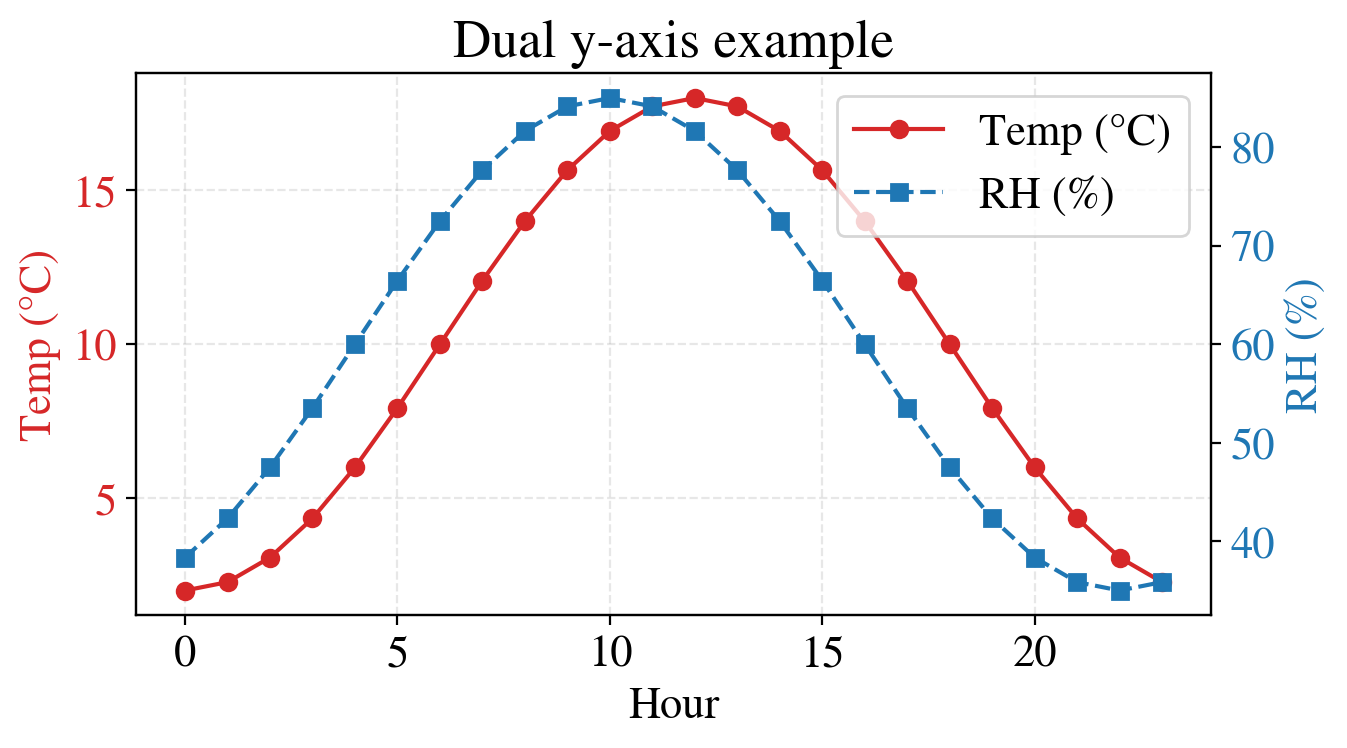

In [137]:
# 双 y 轴：温度/湿度
t = np.arange(0,24)
temp = 10 + 8*np.sin((t-6)/24*2*np.pi)
rh   = 60 + 25*np.cos((t-10)/24*2*np.pi)

fig, ax1 = plt.subplots(figsize=(7,4))
ln1 = ax1.plot(t, temp, 'o-', color='tab:red', label='Temp (°C)')
ax1.set_xlabel("Hour")
ax1.set_ylabel("Temp (°C)", color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True, ls='--', alpha=0.3)

ax2 = ax1.twinx()
ln2 = ax2.plot(t, rh, 's--', color='tab:blue', label='RH (%)')
ax2.set_ylabel("RH (%)", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

lines = ln1+ln2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
ax1.set_title("Dual y-axis example")
plt.tight_layout()
plt.show()


## 等高线与填充图

这段代码展示了如何使用 Matplotlib 同时绘制**等高线图 (`contour`)** 和**填充等高线图 (`contourf`)**。这是可视化三维函数 $Z=f(X, Y)$ 在二维平面上的投影的标准方法，在地理学、气象学和工程学中非常常用。

---

**代码分析表格**

| 代码行 | 作用和功能 | 结果效果 |
| :--- | :--- | :--- |
| `fig, ax = plt.subplots(figsize=(6, 5))` | **初始化图表**。使用面向对象 (OO) 接口创建 Figure (`fig`) 和 Axes (`ax`) 容器。`figsize` 设置画布大小为 6x5。 | 建立了绘图环境，准备绘制 2D 投影图。 |
| `cs = ax.contour(X, Y, Z, levels=10)` | **绘制等高线**。使用 `ax.contour()` 绘制数据矩阵 **$Z$** 的等高线。`levels=10` 指定了绘制 **10 条**等高线。返回值 `cs` 是 `ContourSet` 对象，用于后续添加标签。 | 图上出现 10 条细线，每条线代表一个固定的 $Z$ 值。 |
| `ax.clabel(cs, inline=True, fontsize=9)` | **添加等高线标签**。在等高线上添加表示其 $Z$ 值的数字标签。`inline=True` 使标签周围的等高线被擦除，让标签清晰可见。 | 线上出现数值标签，提高了图表的可读性。 |
| `cf = ax.contourf(X, Y, Z, levels=20, alpha=0.7)` | **绘制填充等高线图**。使用 `ax.contourf()` 绘制填充区域。`levels=20` 用于创建更平滑的颜色渐变。`alpha=0.7` 设置透明度，确保底层的线条（`cs`）和标签（`clabel`）可见。 | 颜色区域覆盖了整个绘图空间，颜色深浅表示 $Z$ 值的大小。 |
| `fig.colorbar(cf, ax=ax, label="Z")` | **添加颜色条**。颜色条是解释填充图的关键。它将颜色映射对象 `cf`（来自 `contourf`）连接到 Axes `ax`。`label="Z"` 标注了颜色条代表的物理量。 | 图表旁边出现一个垂直条，显示颜色与 $Z$ 值之间的对应关系。 |
| `ax.set_title("Contour & Contourf")` | **设置标题**。 | 提供了图表的上下文信息。 |
| `ax.set_xlabel("x"); ax.set_ylabel("y")` | **设置坐标轴标签**。 | 明确了平面上两个维度 $X$ 和 $Y$ 所代表的物理量。 |

---

**效果与应用总结**

这段代码通过结合两种等高线图类型，实现了以下可视化目标：

1.  **直观展示（填充，`contourf`）：** 通过颜色渐变，读者可以**快速识别** $Z$ 值变化趋势和高/低值区域，提供整体感知。
2.  **精确读取（线条与标签，`contour`）：** 通过等高线和标签，读者可以**精确地确定**特定的 $Z$ 值所处的边界，弥补了颜色渐变的模糊性。

这种图表广泛用于需要将**三维数据投影到二维平面**的场景，如绘制气压图、温度场分布或地形图等。

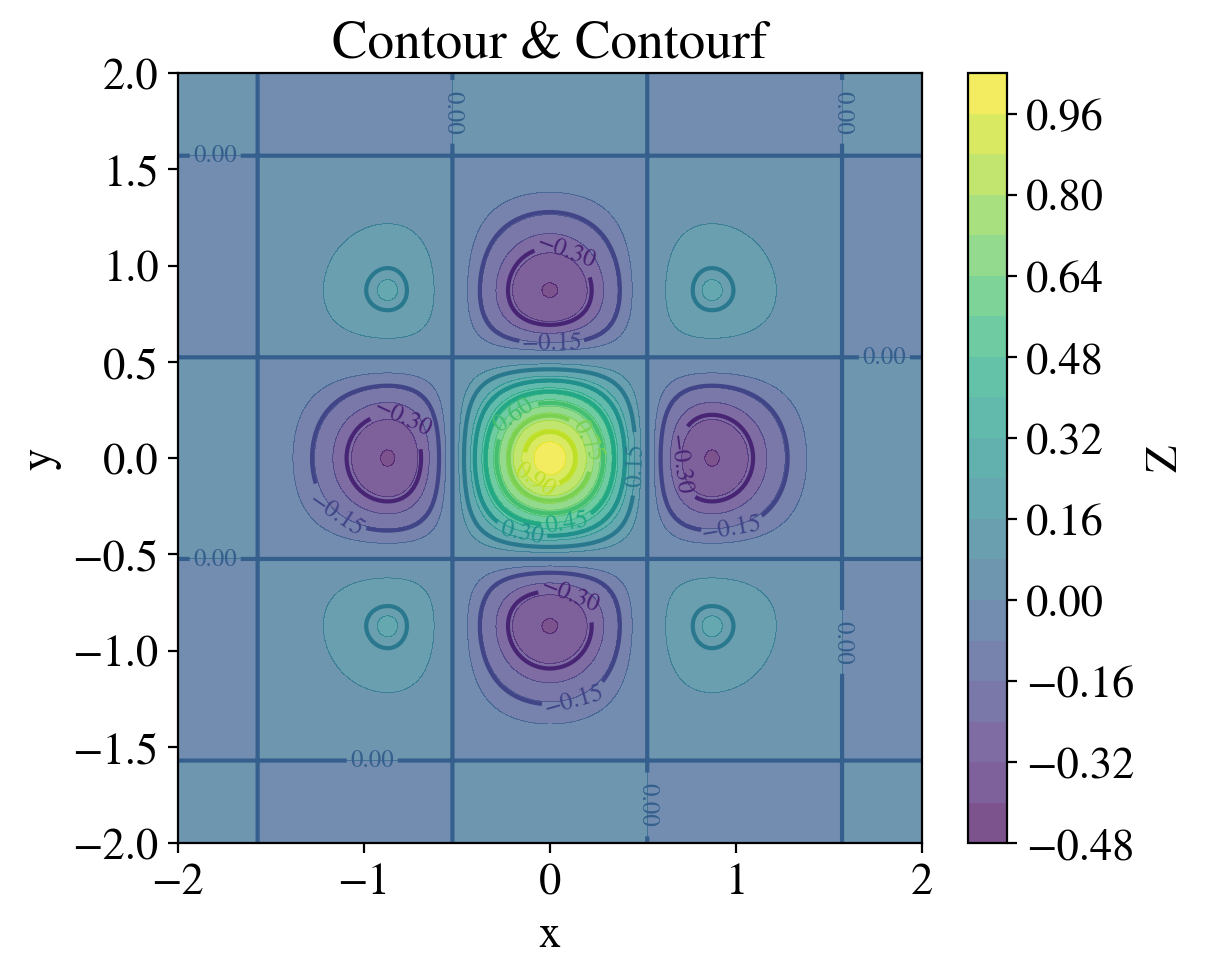

In [135]:
import matplotlib.pyplot as plt

# 等高线 + 填色
X, Y = np.meshgrid(np.linspace(-2,2,200), np.linspace(-2,2,200))
Z = np.exp(-(X**2+Y**2)) * np.cos(3*X) * np.cos(3*Y)

fig, ax = plt.subplots(figsize=(6,5))
cs = ax.contour(X, Y, Z, levels=10)

ax.clabel(cs, inline=True, fontsize=9)
cf = ax.contourf(X, Y, Z, levels=20, alpha=0.7)

fig.colorbar(cf, ax=ax, label="Z")

ax.set_title("Contour & Contourf")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()


---
# SymPy 实用入门：符号计算基础

**模块目标**

SymPy (Symbolic Python) 是一个用于执行**符号数学**的 Python 库。与 NumPy 处理数值计算不同，SymPy 处理的是数学表达式本身，允许进行代数运算、求导、积分等精确数学操作。

本回顾旨在帮助大家了解 SymPy 的核心：定义符号变量和进行基本代数操作。

**核心概念**

1.  **符号变量 (Symbol):** SymPy 的核心。在 SymPy 中，变量（如 $x, y$）必须显式声明为符号，才能进行符号运算。
2.  **表达式 (Expression):** 由符号变量和数学函数构成的代数式。
3.  **精确性:** SymPy 默认使用精确分数、符号常量（如 $\pi, e$）进行计算，避免了浮点数带来的精度损失。


**学习目标**
- 会用 SymPy 做符号化：符号、化简、极限、微分、积分、级数、方程求解、线性代数。
- 在物理教学/计算物理演示中，能把“数值 + 符号”结合起来。

**提示**
- SymPy 与 NumPy 混用时：符号表达式 → `lambdify` 生成数值函数，用 NumPy 批量计算。


In [151]:
import sympy as sp
sp.init_printing()  # Jupyter 里以更友好的形式显示

In [152]:
# 1. 定义单个符号
x = sp.symbols('x')
print(f"符号 x 的类型: {type(x)}")

符号 x 的类型: <class 'sympy.core.symbol.Symbol'>


In [153]:
# 2. 一次定义多个符号 (常用)
a, b, c, z = sp.symbols('a b c z')
a, b, c, z

In [156]:
# 3. 定义希腊字母
alpha = sp.symbols('alpha')
alpha

In [157]:
# 4. 定义表达式
expr1 = a * x**2 + b*x + c

expr2 = sp.sin(x)**2 + sp.cos(x)**2

expr1, expr2

## 基本代数操作

SymPy 提供了许多内置函数来操作表达式，例如展开、因式分解、化简、代入数值等。

| 函数 | 描述 |
| :--- | :--- |
| `expand()` | 展开代数表达式。 |
| `factor()` | 因式分解。 |
| `simplify()` | 尝试将表达式化简到最简单形式。 |
| `subs()` | 代入数值或其他表达式进行求值。 |
| `N()` 或 `evalf()` | 获得表达式的浮点数近似值。 |

In [162]:
# 示例 1: 展开和因式分解
x, y = sp.symbols('x y')
expr1 = (x + y)**2 * (x - y)
expr1

In [164]:
# 展开
expanded_expr = sp.expand(expr1)
print(f"展开后的表达式: {expanded_expr}")

展开后的表达式: x**3 + x**2*y - x*y**2 - y**3


In [166]:
# 因式分解
factored_expr = sp.factor(expanded_expr)
print(f"因式分解后的表达式: {factored_expr}")

因式分解后的表达式: (x - y)*(x + y)**2


In [168]:
# 示例 2: 代入数值 (subs)
expr2 = x**2 + 2*x + 1

# 代入 x=5 进行求值
value = expr2.subs(x, 5)
print(f"\n当 x=5 时，x^2 + 2x + 1 的值为: {value}")


当 x=5 时，x^2 + 2x + 1 的值为: 36


In [170]:
# 示例 3: 精确值与浮点近似值
pi_val = sp.pi + 1
print(f"\n精确值: {pi_val}")
print(f"浮点近似值 (10位): {pi_val.evalf(10)}")


精确值: 1 + pi
浮点近似值 (10位): 4.141592654


## 微积分入门

SymPy 最强大的功能之一就是执行符号微积分，无需手动计算导数或积分公式。

| 函数 | 描述 | 示例 |
| :--- | :--- | :--- |
| `diff(expr, var)` | 对表达式 `expr` 求关于变量 `var` 的导数。 | `diff(sin(x), x)` $\rightarrow$ $\cos(x)$ |
| `integrate(expr, var)` | 对表达式 `expr` 求不定积分。 | `integrate(x**2, x)` $\rightarrow$ $x^3/3$ |
| `integrate(expr, (var, a, b))` | 求定积分，从 $a$ 到 $b$。 | `integrate(x, (x, 0, 1))` $\rightarrow$ $1/2$ |

In [173]:
# 示例 4: 导数 (Derivative)
f = sp.sin(x**2)
df_dx = sp.diff(f, x)

print("f = sin(x^2) 的导数是:"), 
df_dx

f = sin(x^2) 的导数是:


In [175]:
sp.diff(sp.exp(x)*sp.sin(x), x, 2)   # 二阶导

In [177]:
# 示例 5: 不定积分 (Indefinite Integration)

sp.integrate(sp.exp(-x**2), (x, 0, sp.oo))

In [179]:
g = sp.sin(x) 

int_g = sp.integrate(g, x)
print(f"\n不定积分 (exp(x)/x): ")
int_g


不定积分 (exp(x)/x): 


In [181]:
# 示例 5: 不定积分 (Indefinite Integration)
g = sp.exp(x) / x

# 注意: 许多积分没有封闭形式，SymPy 会返回积分形式 (Integral)
int_g = sp.integrate(g, x)
print(f"\n不定积分 (exp(x)/x): ")
int_g


不定积分 (exp(x)/x): 


In [182]:
# 示例 6: 定积分 (Definite Integration)
h = x**3
# 对 x^3 求 0 到 2 的定积分
int_h_def = sp.integrate(h, (x, 0, 2))
print(f"\n定积分 (x^3, 0 到 2): {int_h_def}")


定积分 (x^3, 0 到 2): 4


## 极限 (Limits) 与 级数 (Series)

SymPy 不仅能处理基本代数和微积分，还能精确计算数学分析中的重要概念：极限和泰勒级数（Maclaurin 级数）。

### 1. 极限 (Limits)

使用 `limit()` 函数计算表达式在某个点（包括 $\pm \infty$）的极限。

| 函数 | 描述 | 示例 |
| :--- | :--- | :--- |
| `limit(expr, var, point)` | 计算 $\lim_{var \to point} expr$。 | `limit(sin(x)/x, x, 0)` $\rightarrow$ $1$ |
| `limit(..., dir='-')` | 从左侧趋近（左极限）。 | `limit(1/x, x, 0, dir='-')` $\rightarrow$ $-\infty$ |
| `limit(..., dir='+')` | 从右侧趋近（右极限）。 | `limit(1/x, x, 0, dir='+')` $\rightarrow$ $\infty$ |

$$
\lim_{x \rightarrow 0} \frac{\sin(x)}{x} = 1
$$

In [187]:
x, t = sp.symbols('x t')

# 示例 1: 著名极限 lim(sin(x)/x) as x->0
limit_1 = sp.limit( sp.sin(x)/x, x, 0)
print(f"lim(sin(x)/x) as x->0: {limit_1}") # 输出: 1

lim(sin(x)/x) as x->0: 1


In [189]:
# 示例 2: 无穷极限 lim(x^2/exp(x)) as x->oo
limit_2 = sp.limit(x**2 / sp.exp(x), x, sp.oo) # 'oo' 代表无穷大
print(f"lim(x^2/e^x) as x->oo: {limit_2}") # 输出: 0

lim(x^2/e^x) as x->oo: 0


In [191]:
# 示例 3: 单侧极限 (从右侧趋近)
limit_3 = sp.limit(1/x, x, 0, dir='+')
print(f"lim(1/x) as x->0+: {limit_3}") # 输出: oo

lim(1/x) as x->0+: oo


### 2. 级数 (Series)

使用 `series()` 函数生成表达式的泰勒级数展开。

| 函数 | 描述 | 示例 |
| :--- | :--- | :--- |
| `series(expr, var, x0, n)` | 在 $x_0$ 处对 `expr` 展开，到 $n$ 阶。 | `series(cos(x), x, 0, 4)` |

In [194]:
# 示例 4: cos(x) 在 x=0 处展开到 6 阶
# series(expr, var, point, order)
series_cos = sp.series( sp.cos(x), x, 0, 6)
print(f"cos(x) 的 6 阶展开式: ")
series_cos # 输出: 1 - x**2/2 + x**4/24 + O(x**6), 注意末尾的 O(x**6) 表示展开的误差项 (Landau notation)

cos(x) 的 6 阶展开式: 


In [196]:
# 示例 5: 提取多项式部分 (去除误差项)
poly_part = series_cos.removeO()
print(f"提取多项式部分: ")
poly_part

提取多项式部分: 


In [200]:
series =sp.series(sp.log(1+x), x, 0, 6)  # 到 x^5
series

In [202]:
series.removeO()

## 矩阵/行列式/逆

SymPy 的 `Matrix` 对象是其线性代数功能的基础。与 NumPy 处理数值矩阵不同，SymPy 矩阵可以包含符号表达式，并进行精确的代数操作。

### 1. 矩阵创建 (Matrix Creation)

使用 `Matrix()` 函数创建矩阵。输入通常是列表的列表（行列表）。

### 2. 基本属性与运算

| 方法 / 属性 | 描述 |
| :--- | :--- |
| `M.shape` | 矩阵的形状（维度）。 |
| `M + N` | 矩阵加法（必须形状相同）。 |
| `M * N` | 矩阵乘法（内维必须匹配）。 |
| `M.T` 或 `M.transpose()` | 矩阵转置。 |
| `M.det()` | 计算矩阵的**行列式** (Determinant)。 |
| `M.inv()` | 计算矩阵的**逆** (Inverse)。 |
| `M.rref()` | 计算矩阵的**简化行阶梯形式** (Reduced Row Echelon Form)。 |

In [205]:
# 1. 创建数值矩阵
M_num = sp.Matrix([
    [1, 2],
    [3, 4]
])
print(f"数值矩阵 M_num:")
M_num

数值矩阵 M_num:


⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [207]:
print(f"形状: {M_num.shape}")

形状: (2, 2)


In [209]:
x, y = sp.symbols('x y')

# 2. 创建符号矩阵
M_sym = sp.Matrix([
    [x, 1],
    [2, y]
])
print(f"\n符号矩阵 M_sym:")
M_sym


符号矩阵 M_sym:


⎡x  1⎤
⎢    ⎥
⎣2  y⎦

In [211]:
# 3. 矩阵乘法
M_mult = M_num * M_sym
print(f"\n矩阵乘法 (M_num * M_sym):")
M_mult


矩阵乘法 (M_num * M_sym):


⎡ x + 4   2⋅y + 1⎤
⎢                ⎥
⎣3⋅x + 8  4⋅y + 3⎦

In [213]:
# 4. 行列式 (Determinant)
det_M_sym = M_sym.det()
print(f"\n符号矩阵的行列式: ") # 结果: x*y - 2
det_M_sym


符号矩阵的行列式: 


In [215]:
# 5. 求逆 (Inverse)
inv_M_num = M_num.inv()
print(f"\n数值矩阵的逆:") # 验证：M_num * M_num.inv() 应该得到单位矩阵
inv_M_num


数值矩阵的逆:


⎡-2    1  ⎤
⎢         ⎥
⎣3/2  -1/2⎦

## 线性方程组 (Linear Equations) 与 特征值 (Eigen)

SymPy 不仅可以求解一个方程，还能高效地求解线代中的核心问题。

### 1. 求解线性方程组 (Solving Linear Systems)

SymPy 通常使用矩阵的**简化行阶梯形式 (`rref`)** 或 **`solve_linear_system()`** 函数来求解线性方程组 $A\mathbf{x} = \mathbf{b}$。

### 2. 特征值与特征向量 (Eigenvalues and Eigenvectors)

SymPy 可以符号化地计算方阵的特征值和特征向量。

| 方法 / 属性 | 描述 |
| :--- | :--- |
| `M.eigenvals()` | 返回矩阵的**特征值**及其代数重数（作为 Python 字典）。 |
| `M.eigenvects()` | 返回矩阵的**特征向量**（包含特征值、代数重数和特征向量列表）。 |

In [219]:
# 线性代数：矩阵/行列式/逆/线性方程组/特征

A = sp.Matrix([[2, 1, 0],
               [1, 3, 1],
               [0, 1, 2]])

b = sp.Matrix([1, 2, 3])

detA = A.det()
detA

In [221]:
Ainv = A.inv()
Ainv

⎡5/8   -1/4  1/8 ⎤
⎢                ⎥
⎢-1/4  1/2   -1/4⎥
⎢                ⎥
⎣1/8   -1/4  5/8 ⎦

In [223]:
x_sol = A.LUsolve(b)
x_sol

⎡1/2⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎣3/2⎦

In [225]:
evals = A.eigenvals()     # {特征值: 重数}
print(f"特征值 (值:重数): ") 
evals

特征值 (值:重数): 


In [227]:
print("\n特征向量 (格式: (特征值, 代数重数, [特征向量列表])):")
evecs = A.eigenvects()    # [(lambda, multiplicity, [eigenvectors...]), ...]
evecs


特征向量 (格式: (特征值, 代数重数, [特征向量列表])):


⎡⎛      ⎡⎡1 ⎤⎤⎞  ⎛      ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎢⎜1, 1, ⎢⎢-1⎥⎥⎟, ⎜2, 1, ⎢⎢0 ⎥⎥⎟, ⎜4, 1, ⎢⎢2⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

### 练习： 求解线性方程组

**定义增广矩阵 [A | b]**
方程组:
$$
\begin{align}
 x + 2y + z = 1 \\
 3x + y + 2z = 2 \\
 x + 0*y + z = 3
\end{align}
$$

In [230]:
x, y, z = sp.symbols('x y z')

A_b = sp.Matrix([
    [1, 2, 1, 1],
    [3, 1, 2, 2],
    [1, 0, 1, 3]
])

# 求解 (使用简化行阶梯形式)
rref_form, pivot_cols = A_b.rref()
print("--- 线性方程组 ---")
print(f"增广矩阵的简化行阶梯形式:") # 注意：若最后一列存在非零主元，则无解。此处可用于判断解的情况。
rref_form

--- 线性方程组 ---
增广矩阵的简化行阶梯形式:


⎡1  0  0  -3⎤
⎢           ⎥
⎢0  1  0  -1⎥
⎢           ⎥
⎣0  0  1  6 ⎦

In [247]:
## 你的代码，求解方程
AZ = sp.Matrix([
    [1, 2, 1],
    [3, 1, 2],
    [1, 0, 1]
])
b = sp.Matrix([1,2,3])
x_sol = AZ.LUsolve(b)
x_sol

⎡-3⎤
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎣6 ⎦

---
# 在 Jupyter Notebook 中导入自定义脚本 (模块)

**模块目标**

在实际项目中，我们不会把所有函数都写在一个 Notebook 单元格中。学会将常用的函数封装在独立的 `.py` 文件中，并通过导入（Import）来使用它们，是 Python 模块化编程的基础。

## 步骤 1: 创建外部 Python 脚本

我们首先在与你的 Jupyter Notebook **相同目录下**创建一个名为 `my_utility.py` 的文件。

这个脚本将包含我们想在 Notebook 中使用的自定义函数。

In [271]:
%%writefile my_utility.py
# 文件名: my_utility.py

def square_it(number):
    """计算给定数字的平方。"""
    return number ** 2

def convert_celsius_to_fahrenheit(celsius):
    """将摄氏度转换为华氏度。"""
    fahrenheit = (celsius * 9/5) + 32
    return fahrenheit

# 这是一个不会被导入运行的示例变量
PROJECT_VERSION = "1.0.0"

Overwriting my_utility.py


## 步骤 2: 在 Notebook 中导入和使用

一旦 `my_utility.py` 文件存在于 Notebook 的同一目录下（或者在 Python 的搜索路径中），我们就可以像导入 `numpy` 或 `matplotlib` 一样导入它。

我们推荐使用 `import <module_name> as <alias>` 的方式来保持代码整洁。

In [274]:
# 导入自定义脚本
import my_utility as mu

# 使用导入的函数
result_sq = mu.square_it(5)
print(f"5 的平方是: {result_sq}")

result_temp = mu.convert_celsius_to_fahrenheit(30)
print(f"30°C 转换为华氏度是: {result_temp}°F")

# 访问模块中的变量
print(f"项目版本: {mu.PROJECT_VERSION}")

5 的平方是: 25
30°C 转换为华氏度是: 86.0°F
项目版本: 1.0.0


## 关键注意事项：模块重载 (Reloading)

**问题：** 当你在 Jupyter 外部修改了 `my_utility.py` 文件后，再次运行 `import my_utility as mu`，NumPy **不会**重新加载文件。Python 只在第一次导入时加载模块。

**解决方案：** 要强制 Jupyter 重新加载修改后的模块，我们需要使用 Python 的 `importlib` 库和 Jupyter 的魔术命令。

1.  **激活自动重载魔术命令** (在 Notebook 开始时运行一次)。
2.  **使用 `importlib.reload()`** (只在需要重新加载特定模块时使用)。

In [277]:
# 1. 激活 Jupyter 的模块自动重载功能（推荐在 Notebook 顶部运行）
%load_ext autoreload
%autoreload 2 
# 运行这个命令后，Jupyter 会自动检测并重新加载所有修改过的模块

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [279]:
# --- 假设你现在修改了 my_utility.py 中的某个函数 ---

import my_utility as mu
import importlib

# 2. 如果 %autoreload 没有开启，你也可以手动重载：
# importlib.reload(mu)

# 现在你可以使用你修改后的函数版本了！
# 再次调用函数来测试修改后的行为
print("模块已重新加载，函数可以反映最新修改。")

模块已重新加载，函数可以反映最新修改。



## 练习：

第一步 把以下函数写进脚本 `test.py` 中，并将函数导入进行调用

```python
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)
```

In [288]:
## 你的代码
%%writefile test.py

def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)



UsageError: Line magic function `%%writefile` not found.


第二步 把以下函数加进脚本 `test.py` 中，并将函数导入进行调用

```python
def sum_iterative(n):

    sum_num = 0
    
    for _val in range(n+1):
        # 下一项是前两项之和
        sum_num += _val 
    
    return sum_num
```

In [265]:
## 你的代码

